<a href="https://colab.research.google.com/github/abhinav20021/SpamMailClassifier/blob/main/SpamMailClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies and Libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer #To convert text data into numeric data.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Data Collection & Pre-Processing.

In [24]:
# loading the data from csv file to a pandas Dataframe.
raw_mail_data = pd.read_csv('/content/mail_data.csv')

# replace the null values in dataset with a null string.
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')



Analysing Data.

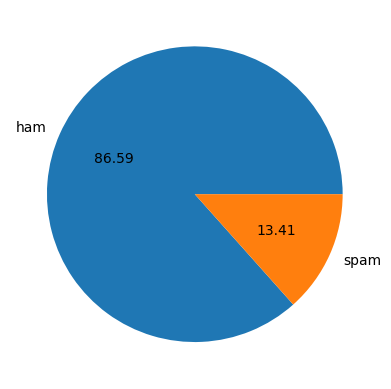

In [29]:
# Knowing size of dataset
mail_data.shape
# Summary of data
mail_data.describe()
# Plotting the data
plt.pie(mail_data['Category'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

Label Encoding.

In [ ]:
# Encoding spam mail as 0 and ham mail as 1.
mail_data.loc[mail_data['Category'] == 'spam', 'Category',] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category',] = 1

# separating the data as texts and label
X = mail_data['Message']
Y = mail_data['Category']

Splitting the data into training data & test data.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

Feature Extraction.

In [ ]:
#transform the text data to feature vectors that can be used as input to the Logistic regression
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase = 1)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# convert Y_train and Y_test values as integers as they are of object data type.
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

Training the model using Logistic Regression


In [ ]:
model = RandomForestClassifier( random_state=2)

# training the RandomForest Classifier model with the training data
model.fit(X_train_features, Y_train)

RandomForestClassifier(random_state=2)

Evaluating the trained model.

In [ ]:
# prediction on training data
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
print('Accuracy on training data : ', accuracy_on_training_data)

# prediction on test data
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
print('Accuracy on testing data : ', accuracy_on_test_data)

Accuracy on training data :  1.0
Accuracy on testing data :  0.9838565022421525


Building a Predictive System.

In [30]:
input_mail = ["Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."]

# convert input text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction
prediction = model.predict(input_data_features)
print(prediction)
if (prediction[0]==1):
  print('This is a Ham mail')
else:
  print('This is a Spam mail')

[1]
This is a Ham mail
